This Code is from : https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm#Data-Project---Stock-Market-Analysis

In [1]:
# pip install -q yfinance

In [2]:
# pip install pandas_datareader

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-06-23,129.110001,130.839996,128.279999,129.330002,129.330002,71855200,AMAZON
2023-06-26,129.330002,131.490005,127.099998,127.330002,127.330002,59989300,AMAZON
2023-06-27,128.630005,130.089996,127.550003,129.179993,129.179993,46801000,AMAZON
2023-06-28,128.940002,131.479996,128.440002,129.039993,129.039993,52149500,AMAZON
2023-06-29,128.770004,129.259995,127.260002,127.900002,127.900002,40761000,AMAZON
2023-06-30,129.470001,131.250000,128.949997,130.360001,130.360001,54310500,AMAZON
2023-07-03,130.820007,131.850006,130.070007,130.220001,130.220001,28264800,AMAZON
2023-07-05,130.240005,131.399994,129.639999,130.380005,130.380005,35895400,AMAZON
2023-07-06,128.250000,128.729996,127.370003,128.360001,128.360001,40639900,AMAZON


In [4]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,155.891674,157.746454,154.326853,156.161115,155.746231,7.175067e+07
std,15.189696,14.992960,15.527174,15.313488,15.429304,2.268667e+07
min,126.010002,127.769997,124.169998,125.019997,124.656982,3.145820e+07
25%,145.305000,147.229996,143.315002,145.480003,145.027657,5.533940e+07
50%,153.110001,155.039993,151.130005,153.339996,152.988388,6.840220e+07
75%,166.095001,167.839996,165.150002,166.320000,166.090271,8.161725e+07
max,193.779999,194.479996,191.759995,193.970001,193.970001,1.647624e+08


In [5]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-07-08 to 2023-07-07
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


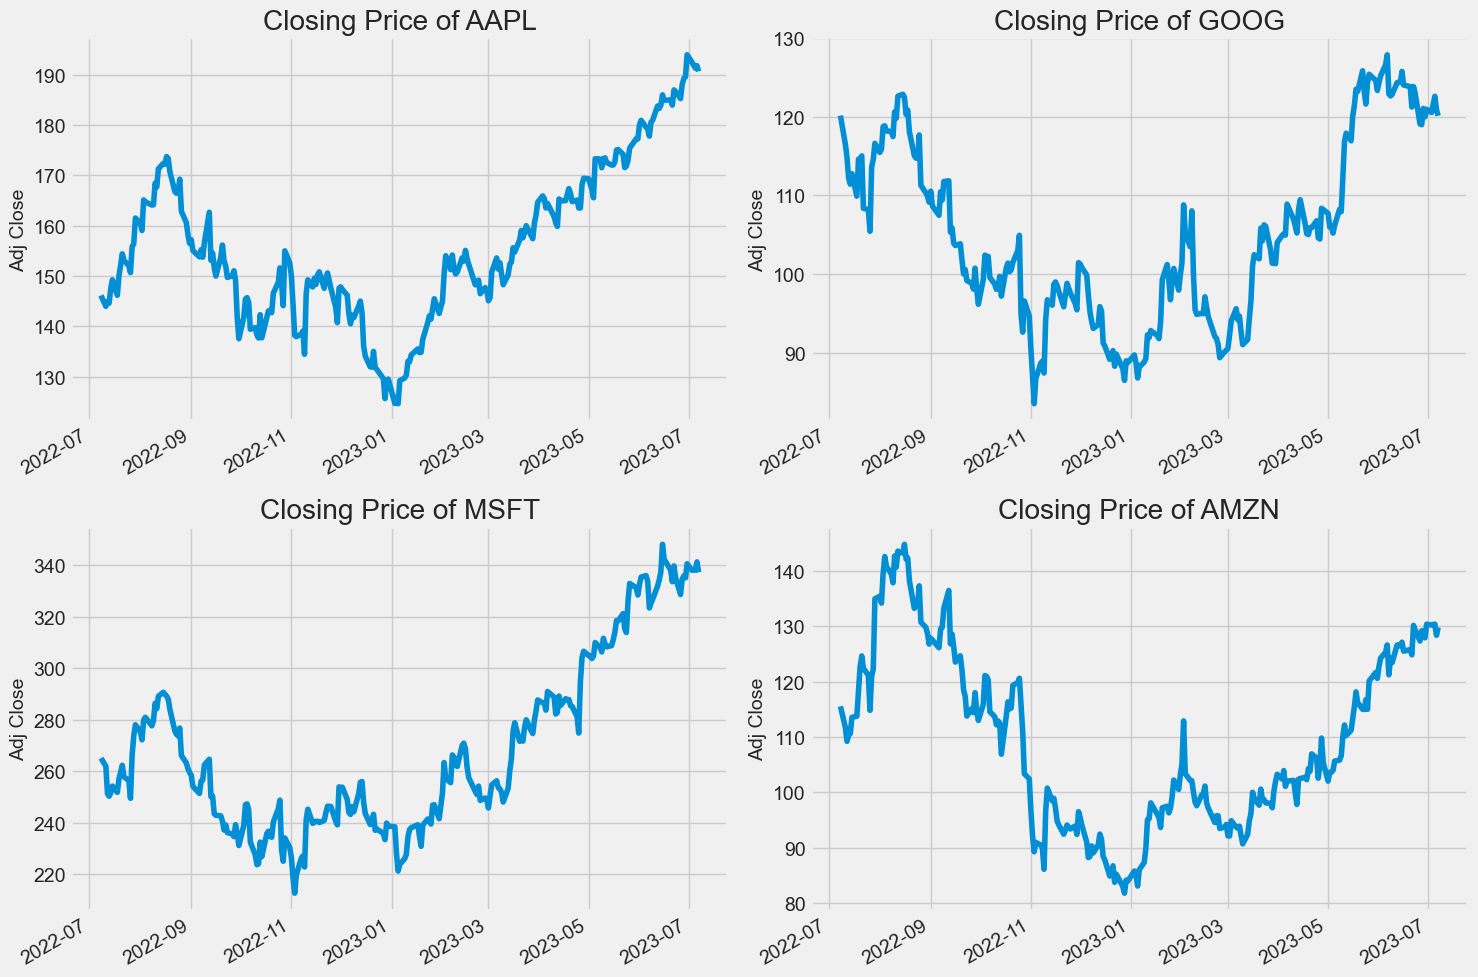

In [6]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

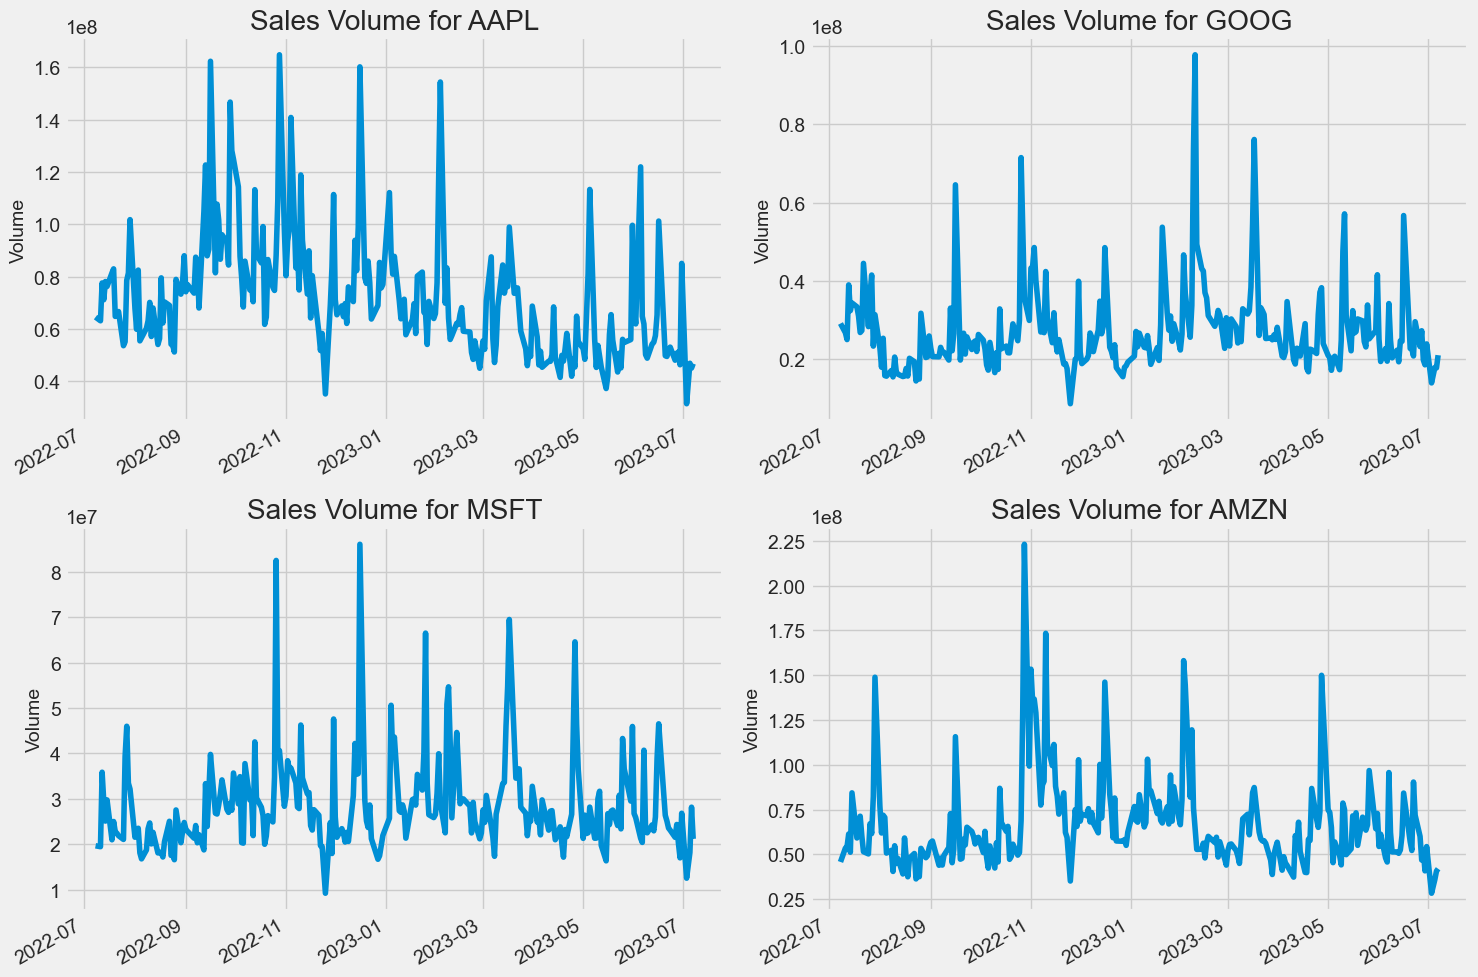

In [7]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

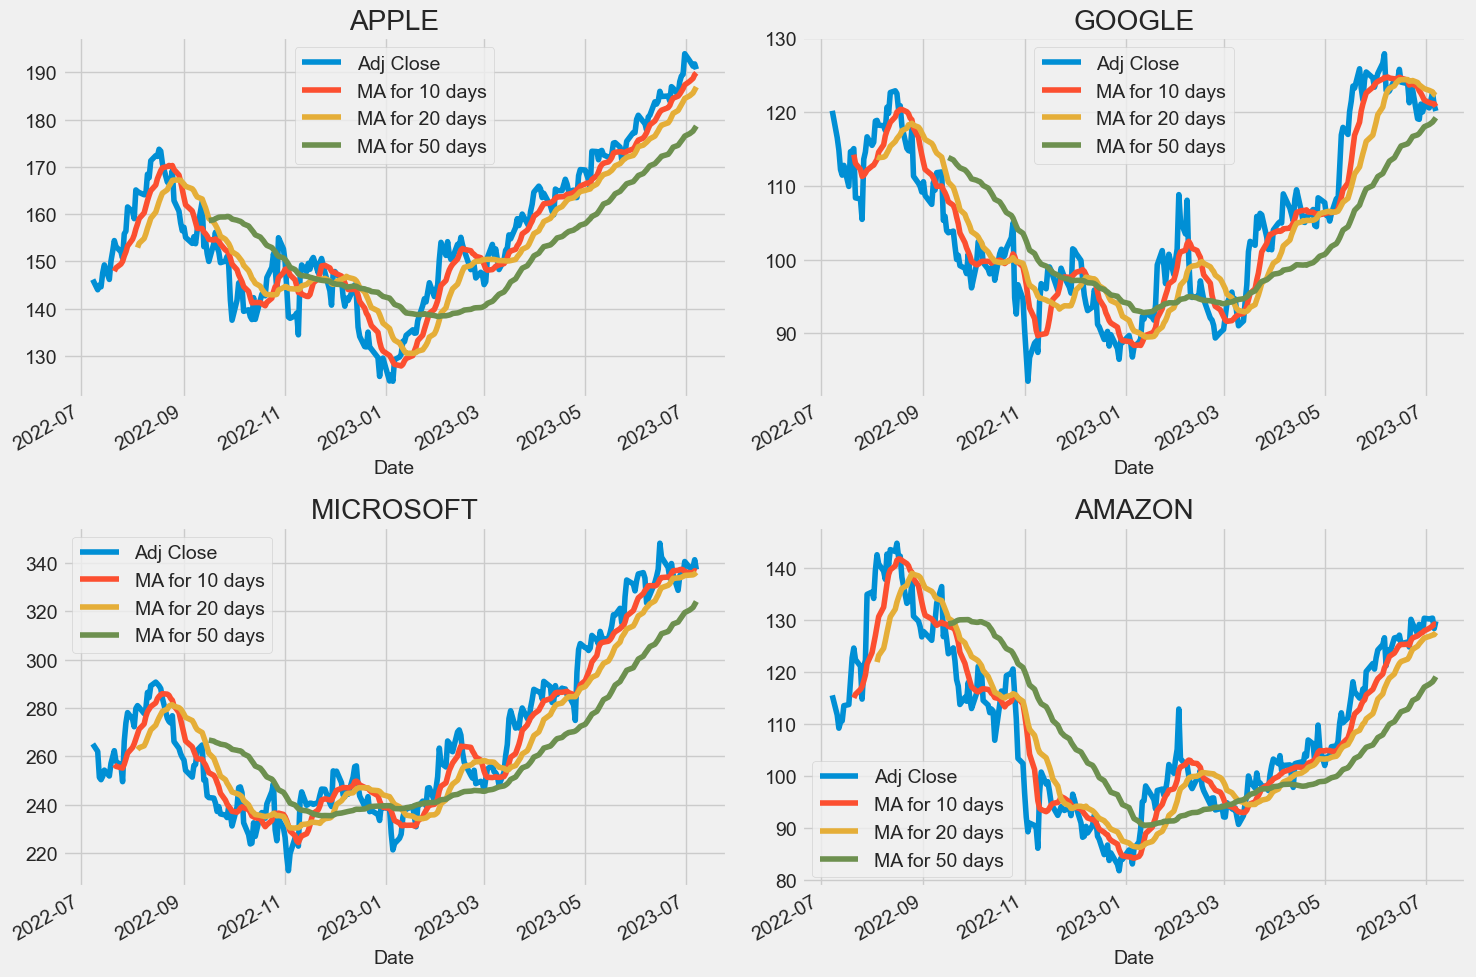

In [8]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

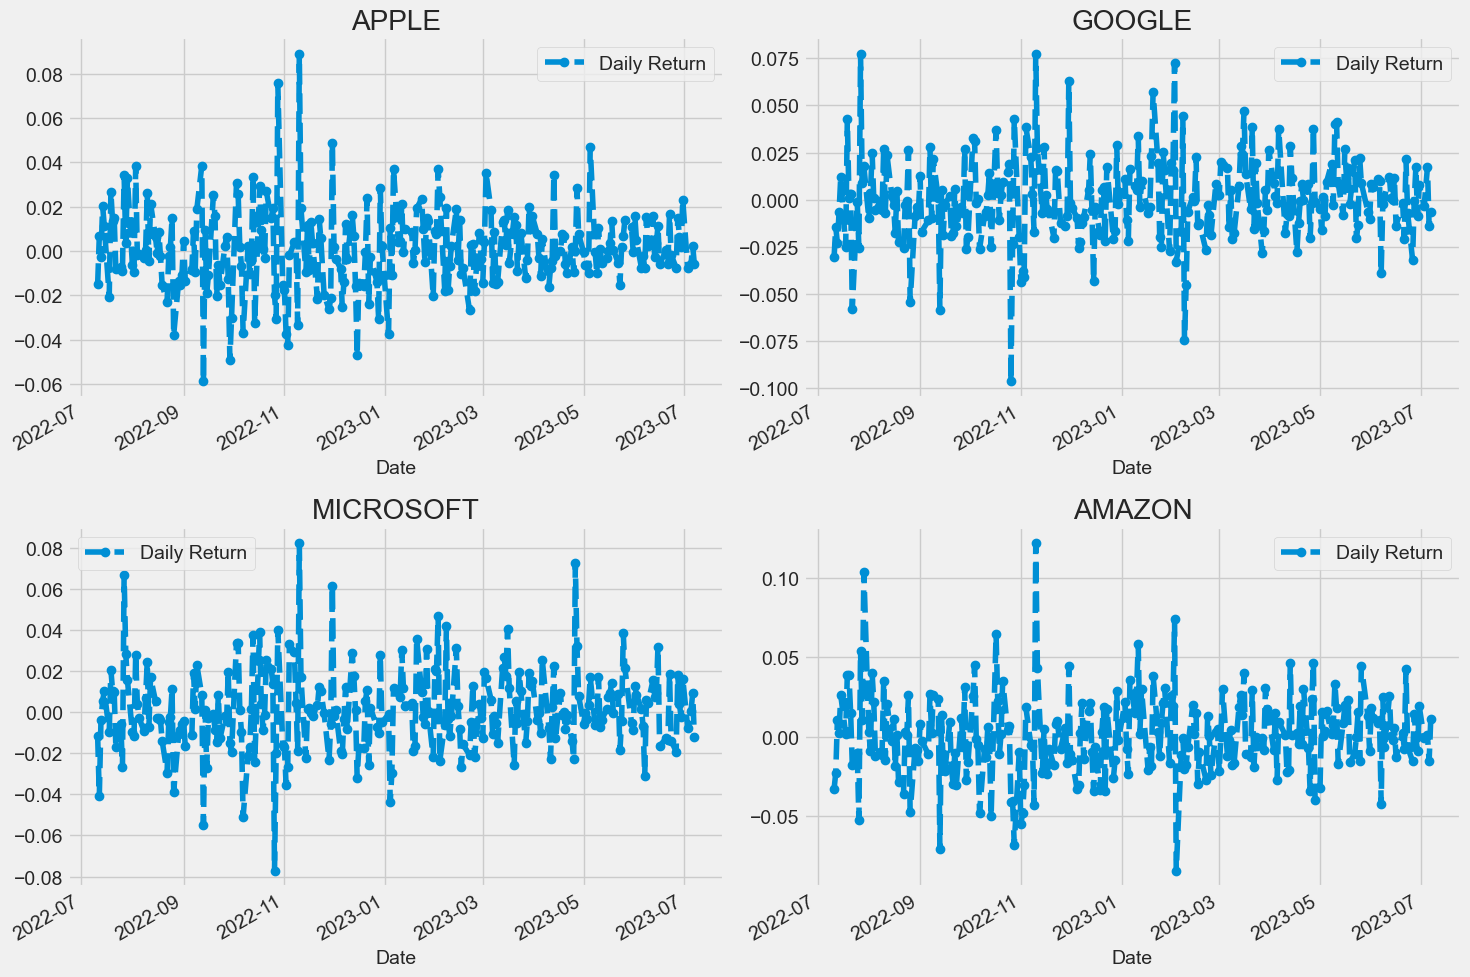

In [9]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

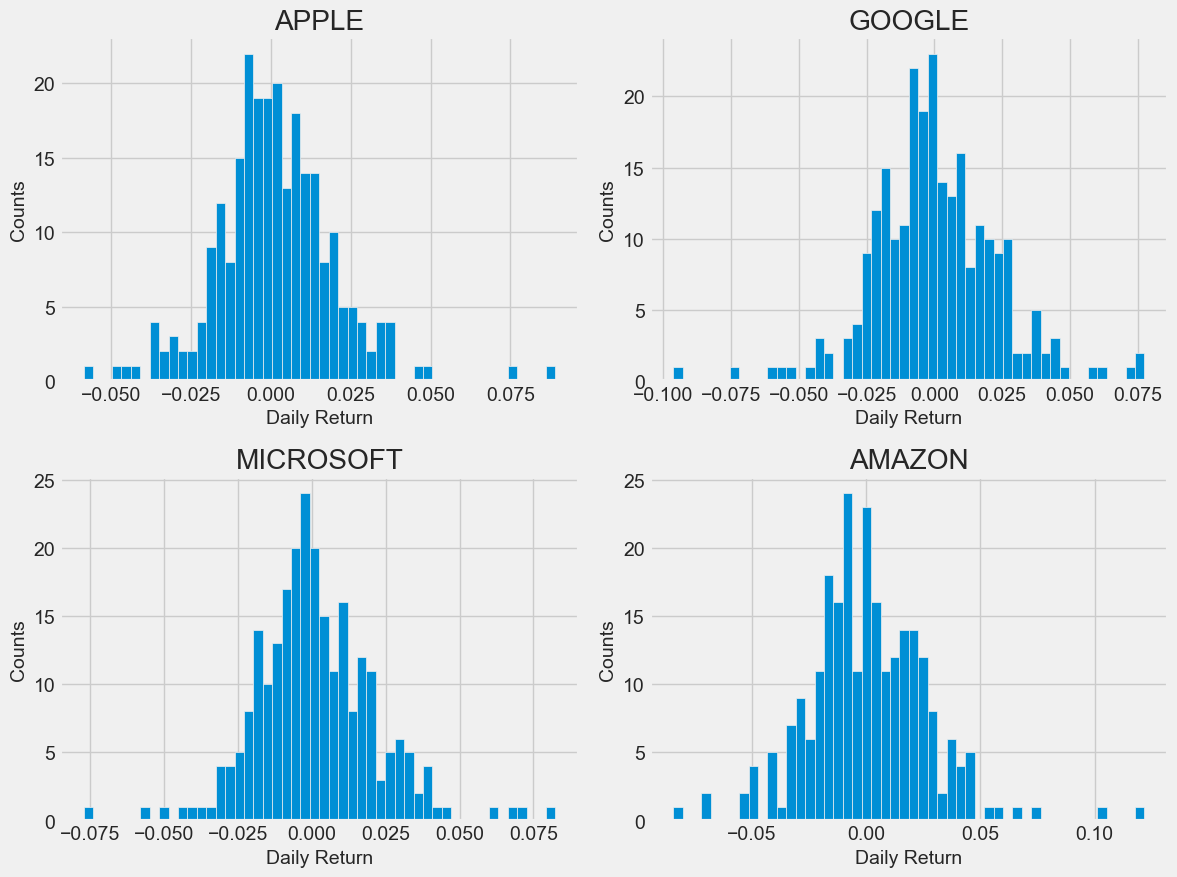

In [10]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [11]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-07-08,NaN,NaN,NaN,NaN
2022-07-11,-0.014758,-0.032803,-0.030341,-0.011769
2022-07-12,0.006834,-0.022640,-0.014358,-0.040982
2022-07-13,-0.002537,0.010804,-0.023183,-0.003745
2022-07-14,0.020482,0.002083,-0.006658,0.005381


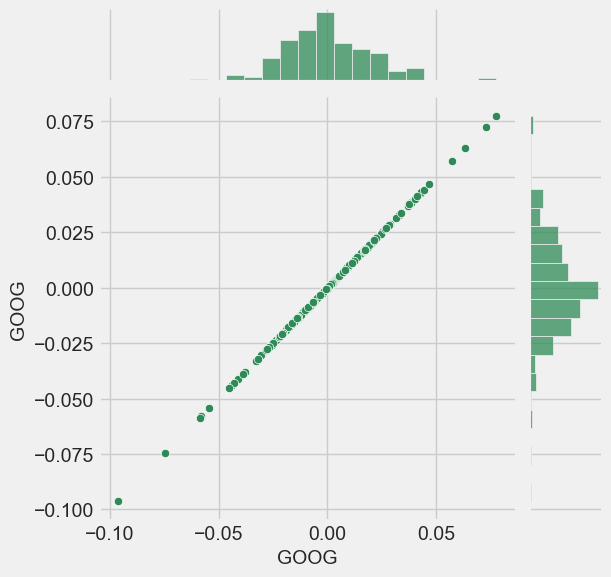

In [12]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

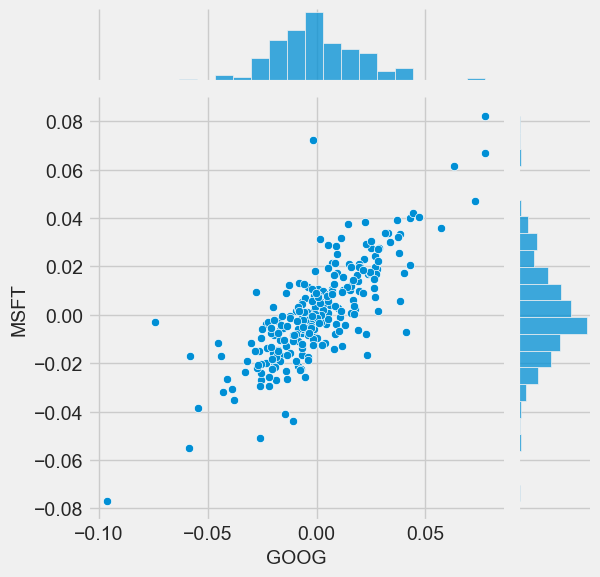

In [13]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

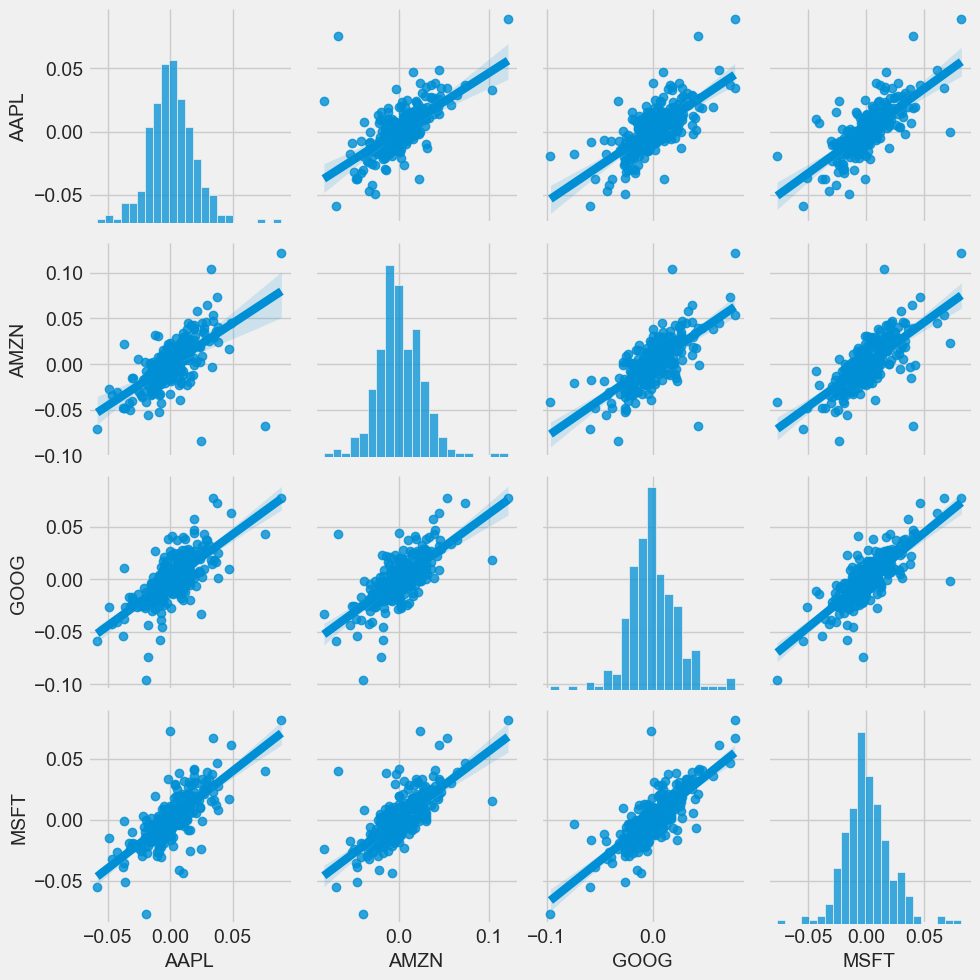

In [14]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

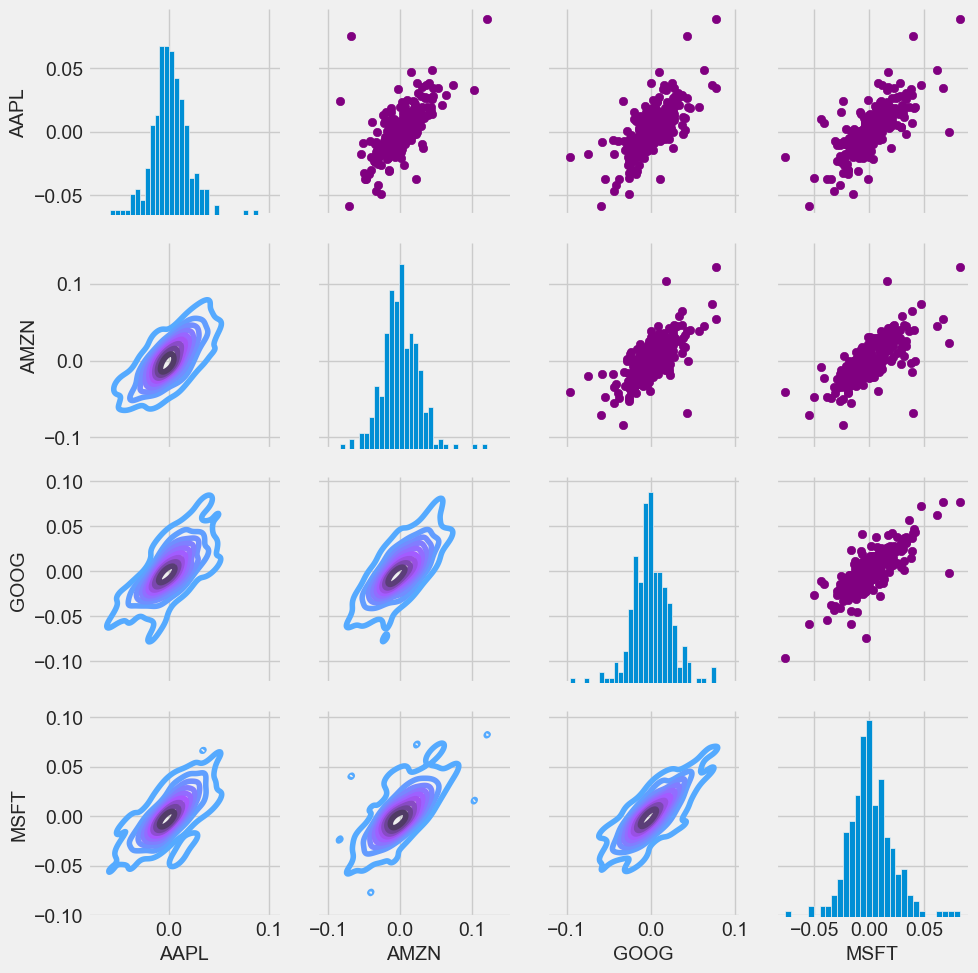

In [15]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

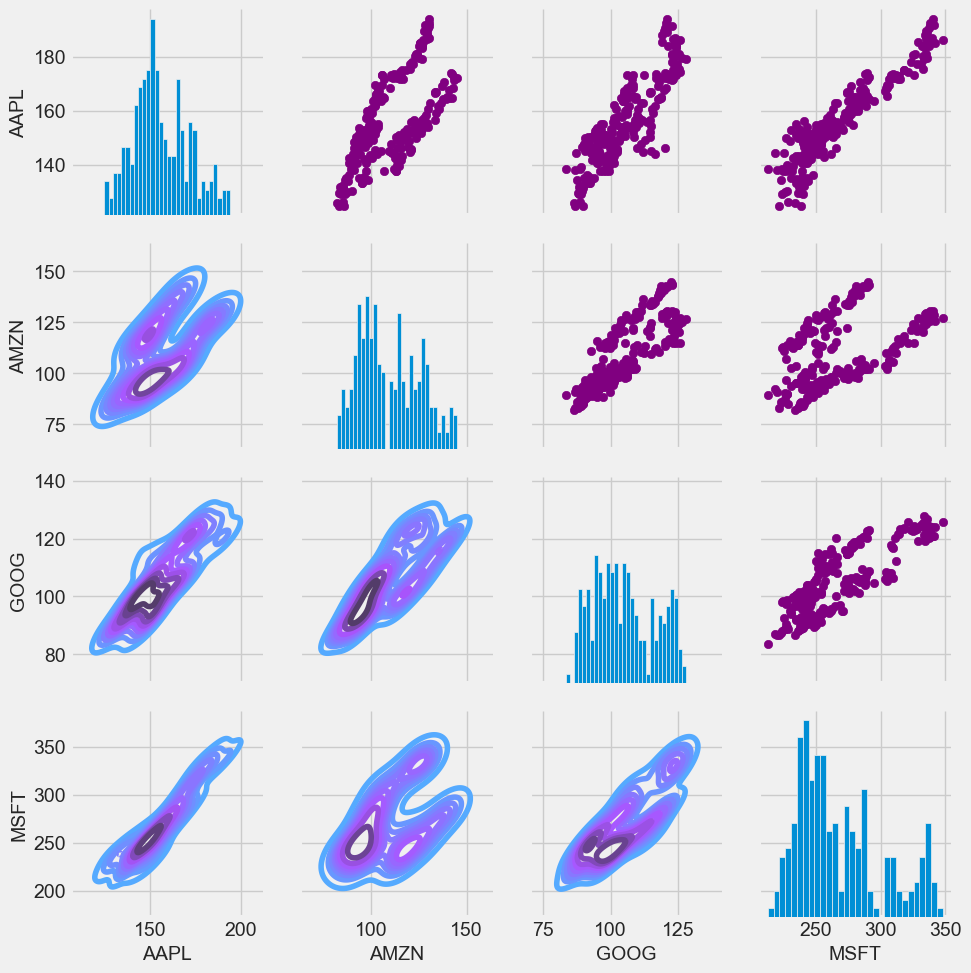

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

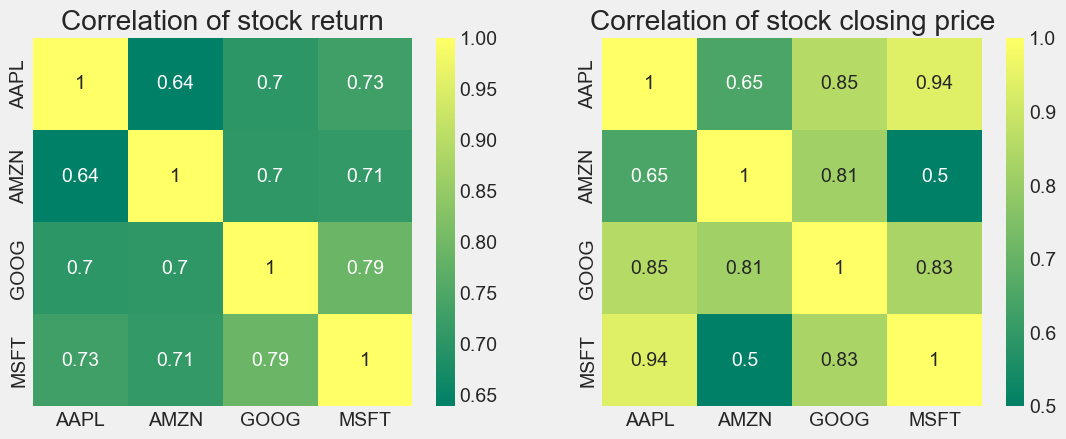

In [17]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

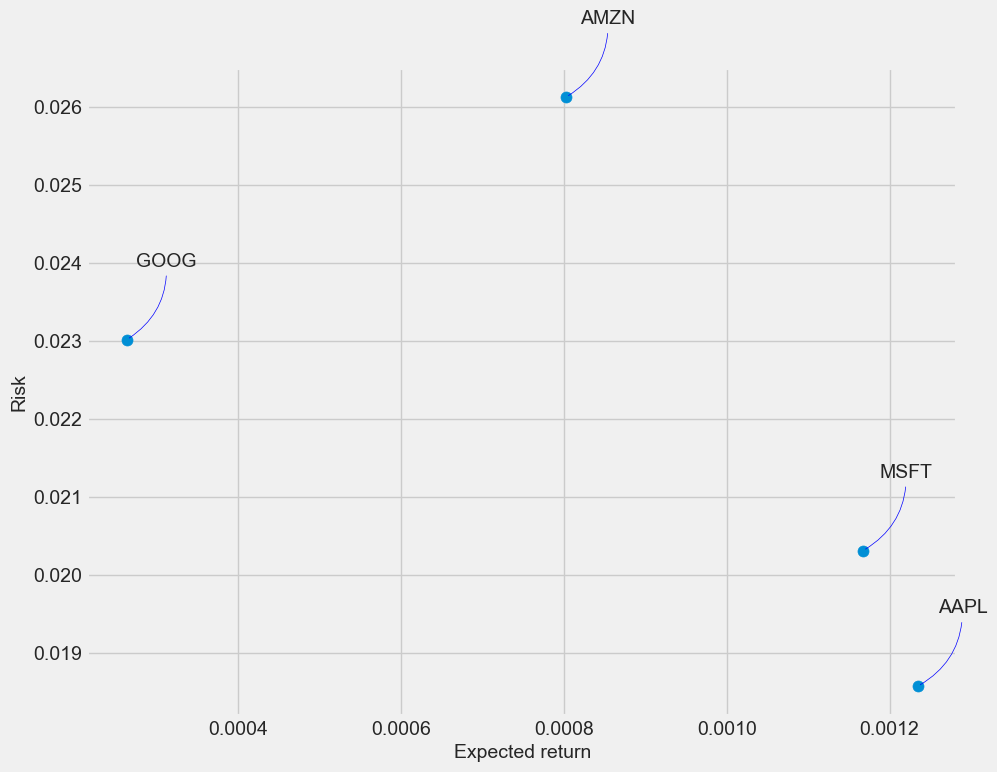

In [18]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

## Predicting the closing price stock price of APPLE inc:

In [19]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482926,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550012,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689343,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821994,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801653,394024400
...,...,...,...,...,...,...
2023-06-30,191.630005,194.479996,191.259995,193.970001,193.970001,85069600
2023-07-03,193.779999,193.880005,191.759995,192.460007,192.460007,31458200
2023-07-05,191.570007,192.979996,190.619995,191.330002,191.330002,46920300


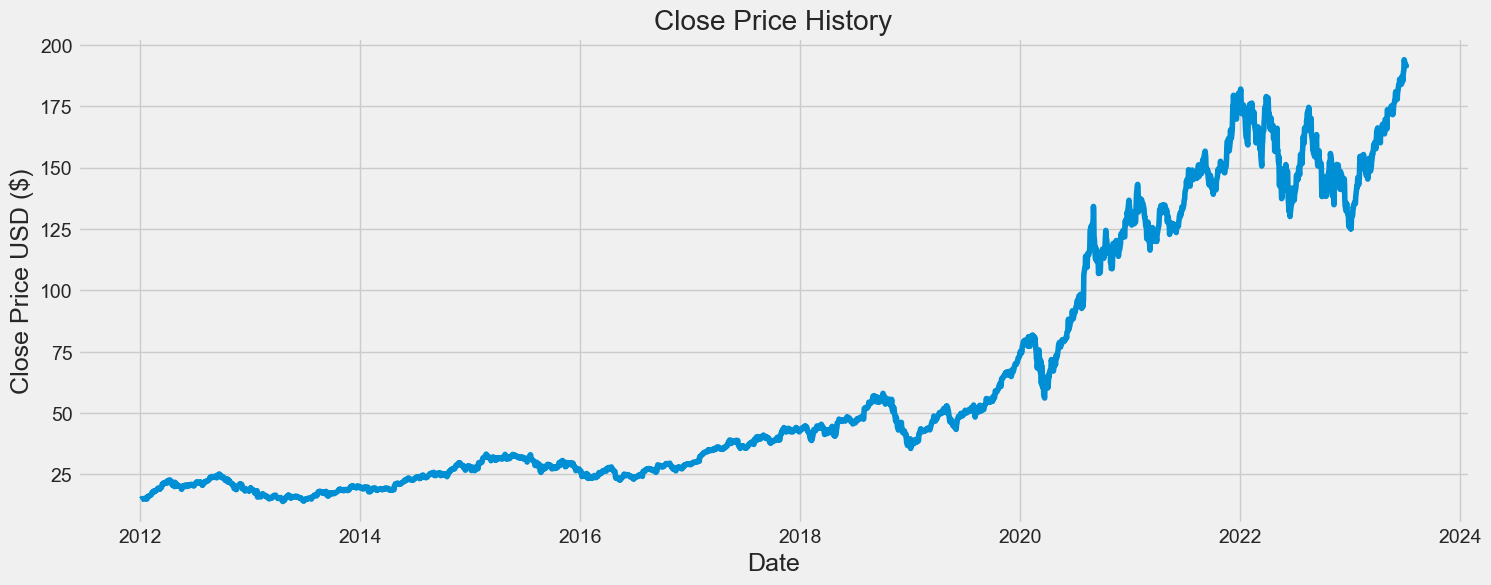

In [20]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [21]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2752

In [22]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00410663],
       [0.00454506],
       [0.00545566],
       ...,
       [0.98533517],
       [0.98800148],
       [0.98172446]])

In [23]:
# # Create the training data set
# # Create the scaled training data set
# train_data = scaled_data[0:int(training_data_len), :]
# # Split the data into x_train and y_train data sets
# x_train = []
# y_train = []

# for i in range(60, len(train_data)):
#     x_train.append(train_data[i-60:i, 0])
#     y_train.append(train_data[i, 0])
#     if i<= 61:
#         print(x_train)
#         print(y_train)
#         print()

# # Convert the x_train and y_train to numpy arrays
# x_train, y_train = np.array(x_train), np.array(y_train)

# # Reshape the data
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# # x_train.shape

In [24]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []
n_future = 1
n_past = 11
for i in range(n_past, len(train_data) - n_future +1):
    x_train.append(train_data[i - n_past:i, 0:train_data.shape[1]])
    y_train.append(train_data[i + n_future - 1:i + n_future, 0]) 

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [25]:
# from keras.models import Sequential
# from keras.layers import Dense, LSTM,Dropout
# model = Sequential()
# model.add(LSTM(64, activation='LeakyReLU', input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
# model.add(LSTM(32, activation='LeakyReLU', return_sequences=False))
# model.add(Dropout(0.2)) # avoid over train
# model.add(Dense(y_train.shape[1]))

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, activation='LeakyReLU', input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='LeakyReLU', return_sequences=False))
model.add(Dropout(0.2)) # avoid over train
model.add(Dense(y_train.shape[1]))

# Compile the model
model.compile(optimizer='adam', loss='mae')

# Train the model
model.fit(x_train, y_train, batch_size=38, epochs=291)

Epoch 1/291
73/73 [==============================] - 3s 6ms/step - loss: 0.0667
Epoch 2/291
73/73 [==============================] - 0s 6ms/step - loss: 0.0243
Epoch 3/291
73/73 [==============================] - 0s 6ms/step - loss: 0.0238
Epoch 4/291
73/73 [==============================] - 0s 6ms/step - loss: 0.0225
Epoch 5/291
73/73 [==============================] - 0s 6ms/step - loss: 0.0212
Epoch 6/291
73/73 [==============================] - 0s 6ms/step - loss: 0.0213
Epoch 7/291
73/73 [==============================] - 0s 6ms/step - loss: 0.0195
Epoch 8/291
73/73 [==============================] - 0s 6ms/step - loss: 0.0197
Epoch 9/291
73/73 [==============================] - 0s 6ms/step - loss: 0.0202
Epoch 10/291
73/73 [==============================] - 0s 6ms/step - loss: 0.0188
Epoch 11/291
73/73 [==============================] - 0s 6ms/step - loss: 0.0195
Epoch 12/291
73/73 [==============================] - 0s 6ms/step - loss: 0.0193
Epoch 13/291
73/73 [=================

73/73 [==============================] - 0s 6ms/step - loss: 0.0152
Epoch 203/291
73/73 [==============================] - 0s 6ms/step - loss: 0.0148
Epoch 204/291
73/73 [==============================] - 0s 6ms/step - loss: 0.0148
Epoch 205/291
73/73 [==============================] - 0s 6ms/step - loss: 0.0155
Epoch 206/291
73/73 [==============================] - 0s 6ms/step - loss: 0.0147
Epoch 207/291
73/73 [==============================] - 0s 6ms/step - loss: 0.0156
Epoch 208/291
73/73 [==============================] - 0s 6ms/step - loss: 0.0148
Epoch 209/291
73/73 [==============================] - 0s 6ms/step - loss: 0.0150
Epoch 210/291
73/73 [==============================] - 0s 6ms/step - loss: 0.0150
Epoch 211/291
73/73 [==============================] - 0s 6ms/step - loss: 0.0154
Epoch 212/291
73/73 [==============================] - 0s 6ms/step - loss: 0.0147
Epoch 213/291
73/73 [==============================] - 0s 6ms/step - loss: 0.0148
Epoch 214/291
73/73 [=========

In [27]:
# n_future = 1
# n_past = 5
# for i in range(n_past, len(test_data) - n_future +1):
#     x_test.append(test_data[i - n_past:i, 0:test_data.shape[1]])

In [28]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 11: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
n_future = 1
n_past = 11
for i in range(n_past, len(test_data) - n_future +1):
    x_test.append(test_data[i - n_past:i, 0:test_data.shape[1]])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 0s 3ms/step


2.3754713585680047

C:\Users\profc\AppData\Local\Temp\ipykernel_5792\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


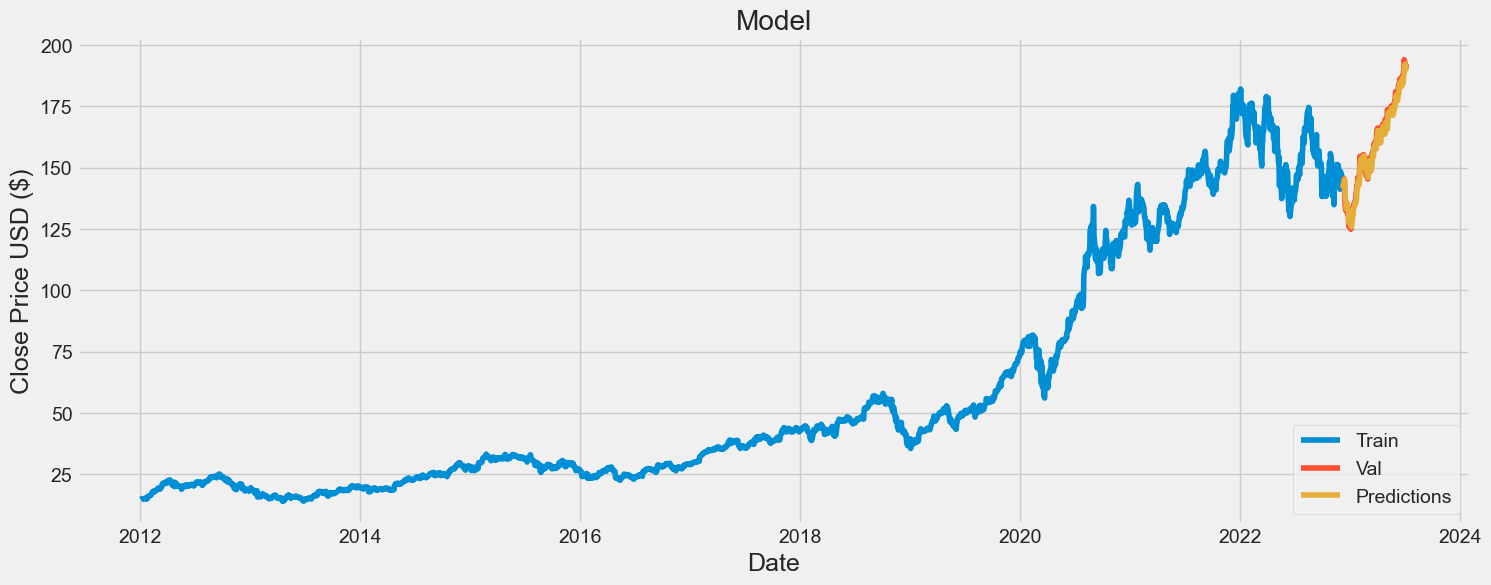

In [29]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [30]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-12-08,142.649994,141.810379
2022-12-09,142.160004,142.834488
2022-12-12,144.490005,142.465866
2022-12-13,145.470001,144.298828
2022-12-14,143.210007,145.220688
...,...,...
2023-06-30,193.970001,188.288315
2023-07-03,192.460007,192.241043
2023-07-05,191.330002,190.743515


In [32]:
#model.save("nnn.h5")